In [1]:
from MultiLayerPerceptron import train, Dense, predict_with_layer_value, train_with_max_error, predict
from activation_functions import Sigmoid
from MultiLayerPerceptron import mse, mse_derivative
from utils import fonts_to_bitmap, bitmap_as_matrix, get_config_params, train_different_architectures
from plots import *
from font import fontDict
import numpy as np
import matplotlib.pyplot as plt

# Load fonts

In [2]:
# Load fonts into list of bitmaps
bitmap_dict = fonts_to_bitmap(fontDict)
bitmap_list = list(bitmap_dict.values())  
bitmap_labels = list(bitmap_dict.keys())  


X = np.reshape(bitmap_list,(len(bitmap_list), 35, 1))
Y = np.array(bitmap_labels)

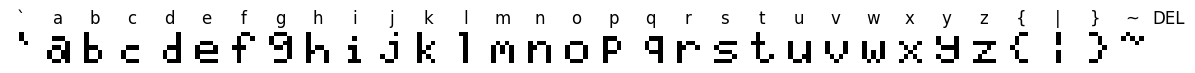

In [3]:
# Reshape each element of X to 7x5
reshaped_X = np.reshape(X, (len(X), 7, 5))

# Create a subplot with 1 row and as many columns as elements in X
fig, axs = plt.subplots(1, len(X), figsize=(12, 6))

# Plot each element of reshaped_X in a separate subplot
for i in range(len(X)):
    axs[i].imshow(reshaped_X[i], cmap='gray_r')
    axs[i].axis('off')
    axs[i].set_title(Y[i])  # Set the title to the corresponding label from Y

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

# Autoencoder

In [4]:
# Retrieve parameters from config file
learning_rate, max_epochs, bias, beta1, beta2, epsilon, optimizer, activation = get_config_params('ejercicio1A_config.json')

mse_list = []

In [5]:
# The latent space is the output of "layer 6"
def generate_autoencoder():
    return [
        Dense(35, 20, optimizer_type=optimizer, learning_rate=learning_rate),
        Sigmoid(),
        Dense(20, 10, optimizer_type=optimizer, learning_rate=learning_rate),
        Sigmoid(),
        Dense(10, 2, optimizer_type=optimizer, learning_rate=learning_rate),
        Sigmoid(),
        Dense(2, 10, optimizer_type=optimizer, learning_rate=learning_rate),
        Sigmoid(),
        Dense(10, 20, optimizer_type=optimizer, learning_rate=learning_rate),
        Sigmoid(),
        Dense(20, 35, optimizer_type=optimizer, learning_rate=learning_rate),
        Sigmoid(),
    ]

#error, epochs = train_with_max_error(autoencoder, mse, mse_derivative, X, X, max_error=0.02, verbose=True)

In [6]:
wrong_dict = {}

def is_same_pixel(pixel1, pixel2):
    return round(pixel1) == round(pixel2)

def compare_bitmaps(input_bitmap, output_bitmap, character, max_wrongs = 1):
    wrongs = 0  
    for i in range(7*5):
        if not is_same_pixel(input_bitmap[i], output_bitmap[i]):
            print(f"Pixel {i} of '{character}' is different: {input_bitmap[i]} != {output_bitmap[i]}")
            wrongs += 1
            if wrongs > max_wrongs:
                return False
            wrong_dict[character] = i
    
    return True

['`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', 'DEL']
Trained for 5000 epochs. Error: 0.025347535510788118
Pixel 30 of 'b' is different: 1 != 3.3875431121940044e-09
Pixel 34 of 'd' is different: 1 != 0.0014676226431848466
Pixel 1 of 'f' is different: 0 != 0.5245028102642252
Pixel 11 of 'f' is different: 1 != 4.4530053354908473e-13
Error in the reconstruction of character 'f'
Pixel 2 of 'g' is different: 1 != 1.099050393856508e-12
Pixel 18 of 'h' is different: 1 != 0.4572838216250896
Pixel 29 of 'h' is different: 1 != 0.00024232388667538068
Error in the reconstruction of character 'h'
Pixel 22 of 'i' is different: 1 != 4.4188694025809153e-07
Pixel 18 of 'j' is different: 1 != 0.4891012277963653
Pixel 15 of 'q' is different: 0 != 0.9999754982966775
Pixel 16 of 't' is different: 1 != 1.6123322166211656e-07
Pixel 29 of 't' is different: 1 != 2.0690463222152134e-10
Error in the recon

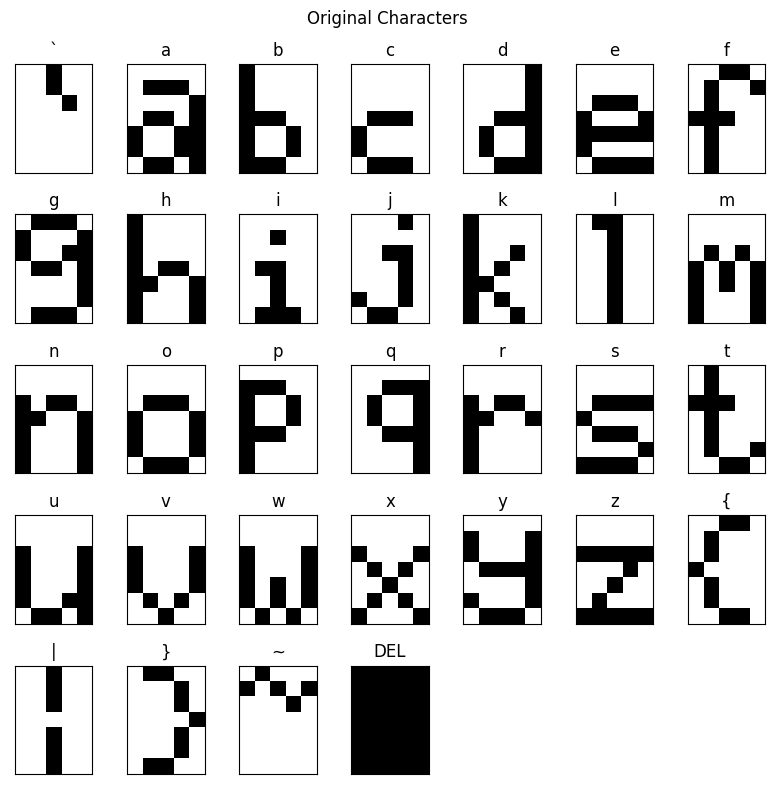

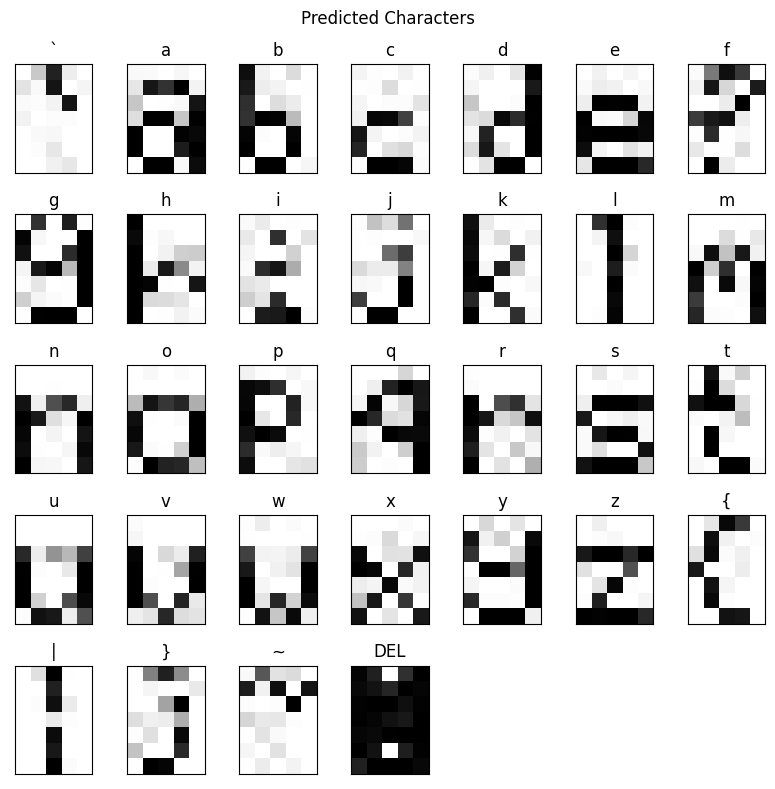

In [7]:
characters = list(bitmap_dict.keys())
print(characters)

epochs = 5000
#max_error = 0.02

#print(f"Training with a maximum allowed error of {max_error}")
autoencoder = generate_autoencoder()
error = train(autoencoder, mse, mse_derivative, X, X, epochs=epochs, verbose=False)
print(f"Trained for {epochs} epochs. Error: {error[-1]}")

latent_spaces = []
raw_latent_spaces = []
input_matrix_list = []
output_matrix_list = []
correct = 0

for c in range(len(characters)):
    input_bitmap = []
    output_bitmap = []

    # X is a list of lists of -lists with a single element-
    for i in range(len(X[c])):
        input_bitmap.append(X[c][i][0])
    input_matrix_list.append(bitmap_as_matrix(input_bitmap))

    # The latent space is the output of "layer 8"
    outputs, raw_latent_space = predict_with_layer_value(autoencoder, X[c], 6)
    raw_latent_spaces.append(raw_latent_space)
    latent_spaces.append((raw_latent_space[0][0], raw_latent_space[1][0]))

    for output in outputs:
        output_bitmap.append(output[0])

    if not compare_bitmaps(input_bitmap, output_bitmap, characters[c]):
        print(f"Error in the reconstruction of character '{characters[c]}'")
    else:
        correct += 1
    
    output_matrix_list.append(bitmap_as_matrix(output_bitmap))

# if(correct == len(characters)):
#     break

#epochs += 1000 # Train for 200 more epochs
#max_error *= 0.9 # Reduce the maximum allowed error by 10%

plot_bitmap_matrix_2(input_matrix_list, characters, "Original Characters")
plot_bitmap_matrix_2(output_matrix_list, characters, "Predicted Characters")

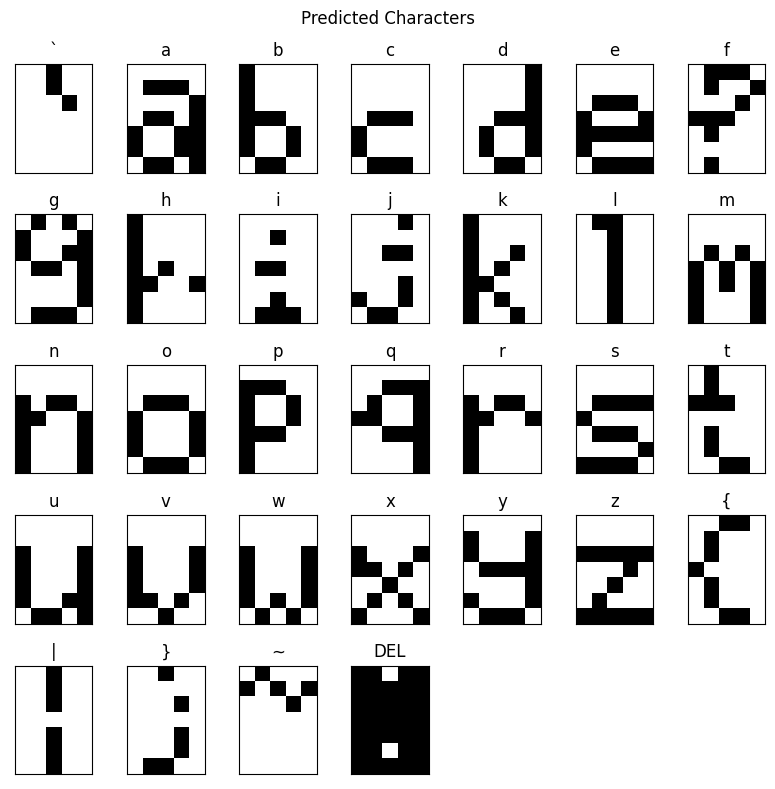

In [27]:
plot_bitmap_matrix_2(np.round(output_matrix_list), characters, "Predicted Characters")

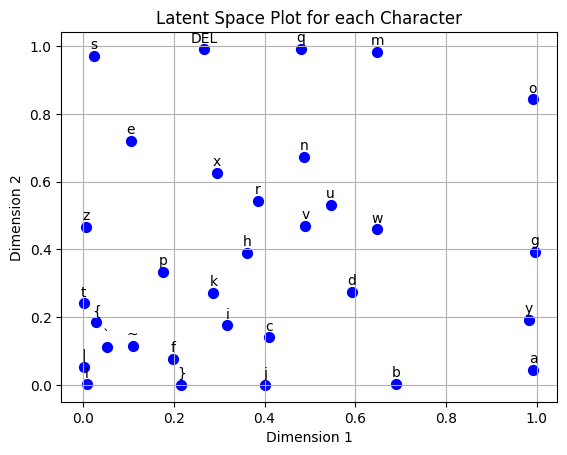

In [8]:
plot_latent_spaces(latent_spaces, characters)